# EDA (Exploratory Data Analysis)

In this Jupyter Notebook, we will execute a exploratory analysis.

Instructions: To run this notebook is required to have a the data/gen/merged.csv file. Generate it using the merge.ipynb


In [23]:
# Importing the libraries
import pandas as pd
import seaborn as sns  # Para visualización de datos mas avanzada
%matplotlib inline
import matplotlib.pyplot as plt # Para visualización de datos

In [2]:
# Constants for the resources
DATA_FILE = 'data/gen/merged.csv'

In [6]:
# Importing the dataset
df = pd.read_csv(DATA_FILE)
df.head()

C:\Users\chama\AppData\Local\Temp\ipykernel_28620\947250292.py:2: DtypeWarning: Columns (3,6,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_FILE)


,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,AGR_OCUP,AGR_DEDICA,AGRESORES_OTROS_TOTAL,AGR_OTROS_HOM,AGR_OTRAS_MUJ,AGR_OTROS_N_OS,AGR_OTRAS_N_AS,INST_DENUN_HECHO,MEDIDAS_SEGURIDAD,LEY_APLICABLE
0,2013.0,Enero,22.0,Guatemala,Víctima,Mujeres,38,02,01,01,...,Ocupaciones ignoradas,NaN,Ninguna,Ninguna,Ninguna,Ninguna,Ninguna,Organismo Judicial,Medidas otorgadas,Ambas leyes (VIF y VCM)
1,2013.0,Enero,24.0,Guatemala,Víctima,Mujeres,20,01,Ninguna,01,...,Trabajadores ambulantes de servicios y afines,NaN,Ignorado,99.0,99.0,99.0,99.0,Ministerio Público,NaN,NaN
2,2013.0,Enero,21.0,Guatemala,Víctima,Mujeres,21,02,01,01,...,Albañiles,NaN,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN
3,2013.0,Enero,2.0,Guatemala,Víctima,Hombres,70,Ninguna,Ninguna,Ninguna,...,NaN,Quehaceres del Hogar,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN
4,2013.0,Enero,10.0,Guatemala,Víctima,Mujeres,36,Ignorado,Ignorado,Ignorado,...,Ocupaciones no especificadas en las anteriores,NaN,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN


Nota: Vemos que tenemos columnas con tipos de datos irregulares. Columnas (3,6,26,28,29)


### Análisis básico manual


In [7]:
df.shape

(328520, 52)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328520 entries, 0 to 328519
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ANO_EMISION            328520 non-null  float64
 1   MES_EMISION            328520 non-null  object 
 2   DIA_EMISION            328520 non-null  float64
 3   DEPTO_MCPIO            328520 non-null  object 
 4   QUIEN_REPORTA          328520 non-null  object 
 5   VIC_SEXO               328520 non-null  object 
 6   VIC_EDAD               328520 non-null  object 
 7   TOTAL_HIJOS            326949 non-null  object 
 8   NUM_HIJ_HOM            326949 non-null  object 
 9   NUM_HIJ_MUJ            326949 non-null  object 
 10  VIC_ALFAB              327881 non-null  object 
 11  VIC_ESCOLARIDAD        327881 non-null  object 
 12  VIC_EST_CIV            326949 non-null  object 
 13  VIC_GRUPET             328520 non-null  object 
 14  VIC_NACIONAL           328520 non-nu

Nota: Vemos que tenemos alrededor de 130.3 MB de data. Podríamos considerar realizar un sampling.


In [9]:
df.isnull().sum()

ANO_EMISION                   0
MES_EMISION                   0
DIA_EMISION                   0
DEPTO_MCPIO                   0
QUIEN_REPORTA                 0
VIC_SEXO                      0
VIC_EDAD                      0
TOTAL_HIJOS                1571
NUM_HIJ_HOM                1571
NUM_HIJ_MUJ                1571
VIC_ALFAB                   639
VIC_ESCOLARIDAD             639
VIC_EST_CIV                1571
VIC_GRUPET                    0
VIC_NACIONAL                  0
VIC_TRABAJA                 639
VIC_OCUP                 218203
VIC_DEDICA               111284
VIC_DISC                      0
TIPO_DISCAQ              321202
VIC_REL_AGR                   0
OTRAS_VICTIMAS                0
VIC_OTRAS_HOM                 0
VIC_OTRAS_MUJ                 0
VIC_OTRAS_N_OS                0
VIC_OTRAS_N_AS                0
HEC_DIA                       0
HEC_MES                       0
HEC_ANO                       0
HEC_DEPTOMCPIO                0
HEC_AREA                      0
HEC_TIPA

Nota: Algunas características poseen demasiados valores nulos.


In [10]:
missing_data_percentage = df.isnull().mean() * 100  # missing data percentage
missing_data_percentage

ANO_EMISION               0.000000
MES_EMISION               0.000000
DIA_EMISION               0.000000
DEPTO_MCPIO               0.000000
QUIEN_REPORTA             0.000000
VIC_SEXO                  0.000000
VIC_EDAD                  0.000000
TOTAL_HIJOS               0.478205
NUM_HIJ_HOM               0.478205
NUM_HIJ_MUJ               0.478205
VIC_ALFAB                 0.194509
VIC_ESCOLARIDAD           0.194509
VIC_EST_CIV               0.478205
VIC_GRUPET                0.000000
VIC_NACIONAL              0.000000
VIC_TRABAJA               0.194509
VIC_OCUP                 66.420005
VIC_DEDICA               33.874346
VIC_DISC                  0.000000
TIPO_DISCAQ              97.772434
VIC_REL_AGR               0.000000
OTRAS_VICTIMAS            0.000000
VIC_OTRAS_HOM             0.000000
VIC_OTRAS_MUJ             0.000000
VIC_OTRAS_N_OS            0.000000
VIC_OTRAS_N_AS            0.000000
HEC_DIA                   0.000000
HEC_MES                   0.000000
HEC_ANO             

Nota: Podríamos descartar algunas columnas que tengan un porcentaje demasiado alto.


Nota: Dado que tenemos un set grande de datos podemos considerar quedarnos con los no valores nulos de algunas columnas. Sin embargo, debemos tomar en cuenta que esto podría disminuir el intervalo de tiempo de los datos.


In [15]:
df.dropna().shape

(61, 52)

**¡Eliminar todas las filas con columnas nulas es inviable!**


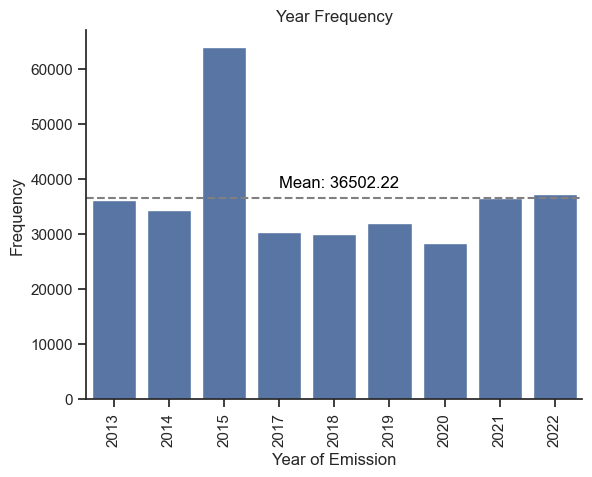

In [51]:
def year_frequency_plot(df, column_name):
    # Set the theme
    sns.set_style("ticks")

    # Calculate the year frequency
    year_frequency = df[column_name].value_counts().sort_index()
    year_frequency.index = year_frequency.index.astype(int)
    # Create a bar plot
    sns.barplot(x=year_frequency.index, y=year_frequency.values, color='b')

    # Calculate the mean of the year frequency
    mean_year = year_frequency.mean()

    # Add a horizontal line for the mean
    plt.axhline(mean_year, color='grey', linestyle='--')

    # Add a text label for the mean
    plt.text(3, mean_year + 2000, f'Mean: {mean_year:.2f}', color='black')

    # Improve the plot appearance
    plt.xlabel('Year of Emission')
    plt.ylabel('Frequency')
    plt.title('Year Frequency')
    plt.xticks(rotation=90)
    sns.despine()

    # Show the plot
    plt.show()


year_frequency_plot(df, 'ANO_EMISION')

Nota: Vemos que tenemos una cantidad considerable de datos para cada año. Todo bien.


De forma arbitraria podemos remover los valores nulos de las columnas que no impactan significativamente.


In [53]:
REMOVE_NULLS_OVER = [
    'TOTAL_HIJOS',
    'NUM_HIJ_HOM',
    'NUM_HIJ_MUJ',
    'VIC_ALFAB',
    'VIC_ESCOLARIDAD',
    'VIC_EST_CIV',
    'VIC_TRABAJA',
    'AGR_EST_CIV'
]
# Remove the rows with nulls in the specified columns
df = df.dropna(subset=REMOVE_NULLS_OVER)

In [54]:
df.shape

(326935, 52)

In [55]:
df.isnull().sum()

ANO_EMISION                   0
MES_EMISION                   0
DIA_EMISION                   0
DEPTO_MCPIO                   0
QUIEN_REPORTA                 0
VIC_SEXO                      0
VIC_EDAD                      0
TOTAL_HIJOS                   0
NUM_HIJ_HOM                   0
NUM_HIJ_MUJ                   0
VIC_ALFAB                     0
VIC_ESCOLARIDAD               0
VIC_EST_CIV                   0
VIC_GRUPET                    0
VIC_NACIONAL                  0
VIC_TRABAJA                   0
VIC_OCUP                 216635
VIC_DEDICA               110627
VIC_DISC                      0
TIPO_DISCAQ              319650
VIC_REL_AGR                   0
OTRAS_VICTIMAS                0
VIC_OTRAS_HOM                 0
VIC_OTRAS_MUJ                 0
VIC_OTRAS_N_OS                0
VIC_OTRAS_N_AS                0
HEC_DIA                       0
HEC_MES                       0
HEC_ANO                       0
HEC_DEPTOMCPIO                0
HEC_AREA                      0
HEC_TIPA